In [1]:
from IPython.display import HTML

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
                $('button#code-toggle').text('Show Code');
            } else {
                $('div.input').show();
                $('button#code-toggle').text('Hide Code');
            }
            code_show = !code_show
        }
    </script>

    <button id="code-toggle" onclick="javascript:code_toggle()">
        Hide Code
    </button>
''')

# Unit 1 Capstone: Narrative Analytics & Experimentation

## 1 – Explore the Data 

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("PoliceKillingsUS.csv", engine="python")
df.head(100)

df[df['signs_of_mental_illness']]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
12,22,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.0,M,B,Columbus,OH,True,other,Not fleeing,False
21,42,Tommy Smith,11/01/15,shot,gun,39.0,M,W,Arcola,IL,True,attack,Not fleeing,False
25,48,Richard McClendon,13/01/15,shot,knife,43.0,M,W,Jourdanton,TX,True,other,Not fleeing,False
28,51,Mario Jordan,14/01/15,shot,gun,34.0,M,B,Chesapeake,VA,True,attack,Not fleeing,False
34,60,Quincy Reed Reindl,15/01/15,shot,gun,24.0,M,W,Bloomington,MN,True,attack,Not fleeing,False
35,63,Jose Ceja,15/01/15,shot,knife,36.0,M,H,Fairfield,CA,True,other,Not fleeing,False
42,80,Jonathan Guillory,18/01/15,shot,gun,32.0,M,W,Maricopa,AZ,True,attack,Not fleeing,False
43,83,Carter Castle,18/01/15,shot and Tasered,gun,67.0,M,W,Gunlock,KY,True,attack,Not fleeing,False


### Location
#### California, Texas, and Florida have experienced the most police killings from Jan 2, 2015 - July 31, 2017 (424, 225, and 154 each, respectively). Ohio and Oklahoma are tied for 4th highest number of police killings, with 76 each.

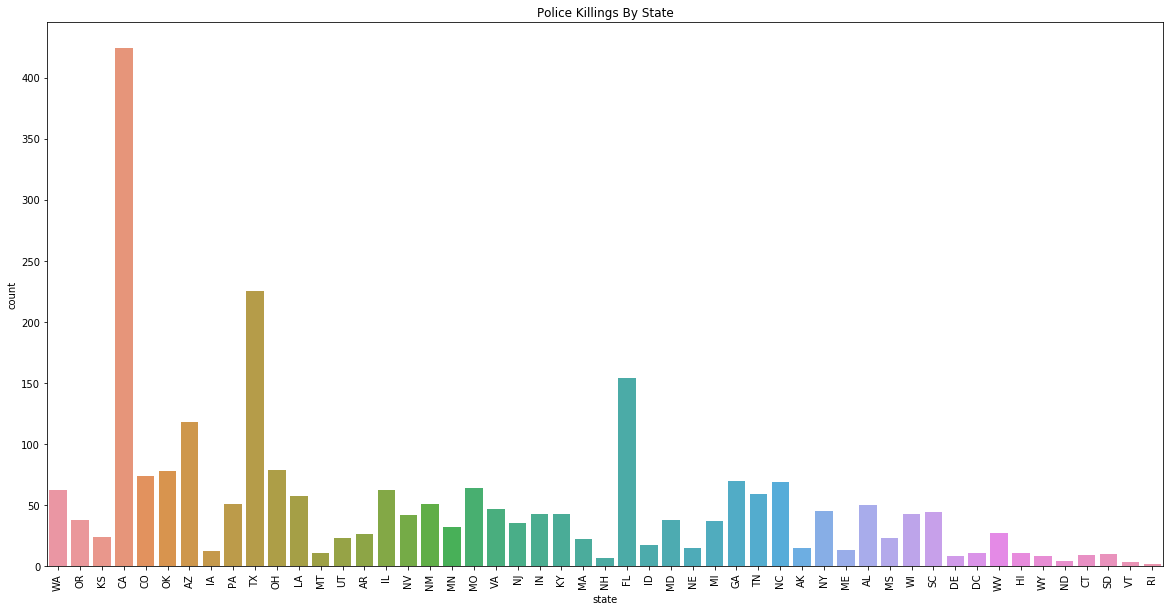

In [74]:
first_date = df['date'].unique()[0]
last_date = df['date'].unique()[-1]

figure = plt.figure(figsize=(20,10))

figure.add_subplot(1, 1, 1)
g = sns.countplot(x='state', data=df)
g.set_xticklabels(df['state'].unique(), rotation=90)
plt.title('Police Killings By State')
plt.show()

### Body Camera
#### 89.31% of all police killings were WITHOUT a body camera. 

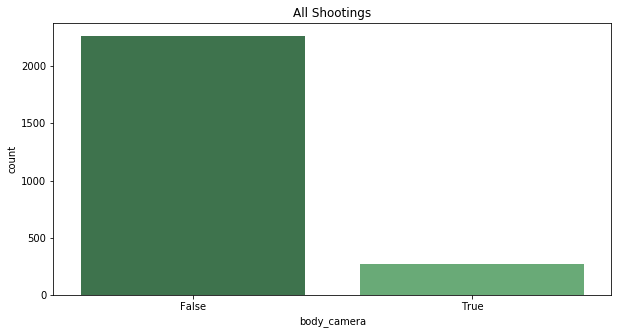

In [59]:
total_shootings_count = df.shape[0]
df.loc[:,'is_armed'] = df['armed'].apply(lambda x: 'unarmed' if x == 'unarmed' else 'armed')

no_camera = df[df['body_camera'] == False]
no_camera_count = no_camera.count()['id']

has_camera = df[df['body_camera']]
has_camera_count = has_camera.count()['id']

percent_no_camera = round(no_camera_count / total_shootings_count * 100, 2)

figure = plt.figure(figsize=(10,5))

figure.add_subplot(1, 1, 1)
plt.title('All Shootings')
sns.countplot(x="body_camera", data=df, palette="Greens_d")

plt.show()

### Body Camera vs. Unarmed Victims
#### 6.75% of all police killings had unarmed victims. 84.21% of unarmed victims were killed WITHOUT a body camera.

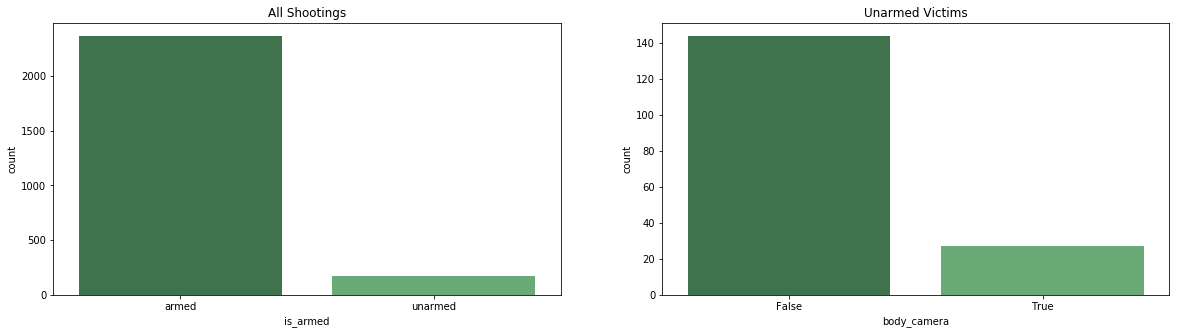

In [60]:
total_unarmed = df[df['armed'] == 'unarmed']
total_unarmed_count = total_unarmed.count()['id']

no_camera_unarmed = no_camera[no_camera['armed'] == 'unarmed']
no_camera_unarmed_count = no_camera_unarmed.count()['id']

has_camera_unarmed = has_camera[has_camera['armed'] == 'unarmed']
has_camera_unarmed_count = has_camera_unarmed.count()['id']

percent_unarmed = round(total_unarmed_count / total_shootings_count * 100, 2)
percent_unarmed_no_camera = round(no_camera_unarmed_count / total_unarmed_count * 100, 2)
percent_unarmed_has_camera = round(has_camera_unarmed_count / total_unarmed_count * 100, 2)

figure = plt.figure(figsize=(20,5))

figure.add_subplot(1, 2, 1)
plt.title('All Shootings')
sns.countplot(x="is_armed", data=df, palette="Greens_d")

figure.add_subplot(1, 2, 2)
plt.title('Unarmed Victims')
sns.countplot(x="body_camera", data=total_unarmed, palette="Greens_d")

plt.show()

#### 6.36% of police killings were WITHOUT a body camera had unarmed victims. 9.96% of police killings WITH a body camera had unarmed victims.

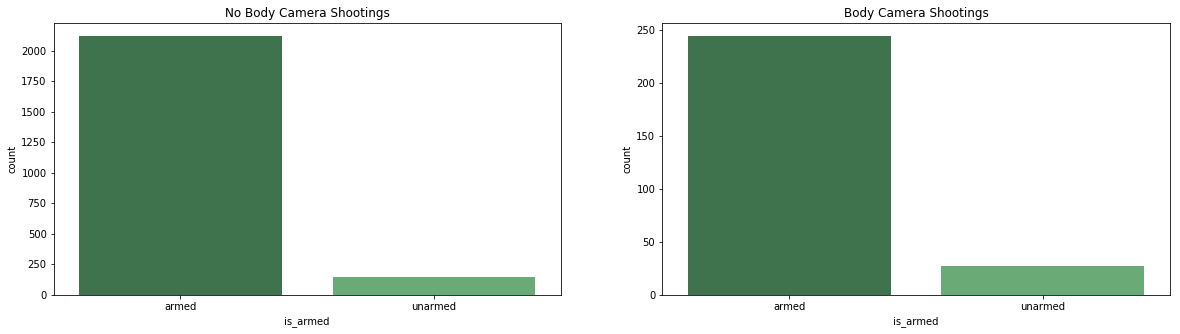

In [61]:
percent_no_camera_unarmed = round(no_camera_unarmed_count / no_camera_count * 100, 2)
percent_has_camera_unarmed = round(has_camera_unarmed_count / has_camera_count * 100, 2)

figure = plt.figure(figsize=(20,5))

figure.add_subplot(1, 2, 1)
plt.title('No Body Camera Shootings')
sns.countplot(x="is_armed", data=no_camera, palette="Greens_d")

figure.add_subplot(1, 2, 2)
plt.title('Body Camera Shootings')
sns.countplot(x="is_armed", data=has_camera, order=['armed', 'unarmed'], palette="Greens_d")

plt.show()

### Body Camera vs. Mentally Ill Victims
#### 24.97% of all police killings had mentally ill victims. 88.47% of mentally ill victims were killed WITHOUT a body camera.

In [75]:
def label_race(row):
    return 'hi'

df.apply(lambda row: label_race(row),axis=1)

0       hi
1       hi
2       hi
3       hi
4       hi
5       hi
6       hi
7       hi
8       hi
9       hi
10      hi
11      hi
12      hi
13      hi
14      hi
15      hi
16      hi
17      hi
18      hi
19      hi
20      hi
21      hi
22      hi
23      hi
24      hi
25      hi
26      hi
27      hi
28      hi
29      hi
        ..
2505    hi
2506    hi
2507    hi
2508    hi
2509    hi
2510    hi
2511    hi
2512    hi
2513    hi
2514    hi
2515    hi
2516    hi
2517    hi
2518    hi
2519    hi
2520    hi
2521    hi
2522    hi
2523    hi
2524    hi
2525    hi
2526    hi
2527    hi
2528    hi
2529    hi
2530    hi
2531    hi
2532    hi
2533    hi
2534    hi
Length: 2535, dtype: object

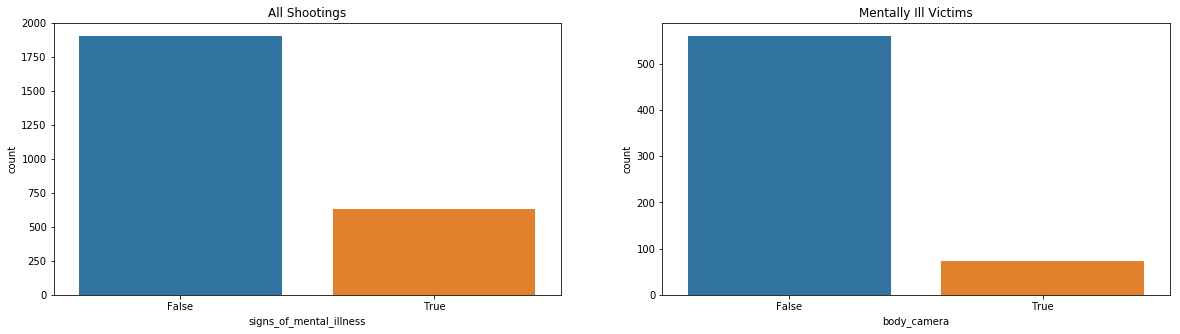

In [62]:
# df.loc[:,'is_mentally_ill_and_not_threat'] = 

total_mental = df[df['signs_of_mental_illness']]
total_mental_count = total_mental.count()['id']

no_camera_mental = no_camera[no_camera['signs_of_mental_illness']]
no_camera_mental_count = no_camera_mental.count()['id']

has_camera_mental = has_camera[has_camera['signs_of_mental_illness']]
has_camera_mental_count = has_camera_mental.count()['id']

percent_mental = round(total_mental_count / total_shootings_count * 100, 2)
percent_mental_no_camera = round(no_camera_mental_count / total_mental_count * 100, 2)
percent_mental_has_camera = round(has_camera_mental_count / total_mental_count * 100, 2)

figure = plt.figure(figsize=(20,5))

figure.add_subplot(1, 2, 1)
plt.title('All Shootings')
sns.countplot(x="signs_of_mental_illness", data=df)

figure.add_subplot(1, 2, 2)
plt.title('Mentally Ill Victims')
sns.countplot(x="body_camera", data=total_mental)
plt.show()

#### 24.73% of police killings WITHOUT a body camera had mentally ill victims. 26.94% of police killings WITH a body camera had mentally ill victims.

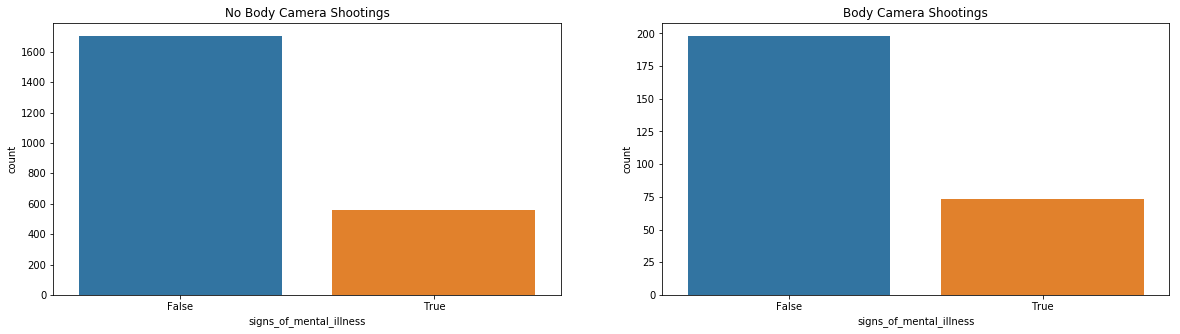

In [63]:
percent_no_camera_mental = round(no_camera_mental_count / no_camera_count * 100, 2)
percent_has_camera_mental = round(has_camera_mental_count / has_camera_count * 100, 2)

figure = plt.figure(figsize=(20,5))

figure.add_subplot(1, 2, 1)
plt.title('No Body Camera Shootings')
sns.countplot(x="signs_of_mental_illness", data=no_camera)

figure.add_subplot(1, 2, 2)
plt.title('Body Camera Shootings')
sns.countplot(x="signs_of_mental_illness", data=has_camera)
plt.show()

## 2 – Experimentation RFC 

using data selected, propose and outline an experiment plan. The plan should consist of 3 key components:

### Experimental Hypothesis

How can police departments decrease the number of unarmed or mentally ill suspects their officers kill? This is a pertinent issue to study and solve, not only because unjustified police killings is morally apprehensible and counter to a police officer's duty to "protect and serve", but also because such incidents decrease public trust in the police, making it more difficult for competent officers to do their job well. Furthermore, a police department must divert precious time and resources in the event of an unjustified police killing to deal with negative news coverage, rather than allocating those resources to their officers and operations. 

In related studies, researchers cite lack of officer accountability and insufficient de-escalation and mental health training as major reasons for officers shootings unarmed and mentally ill suspects.

### Potential Solution

This experiment will test the hypothesis that 1) enforcing that all police officers wear a body camera at all times, 2) increasing mandatory de-escalation training, and 3) increasing mandatory mental health training will decrease the number of unjustified police killings (i.e. of unarmed or mentally ill suspects).

### Rollout Plan 
Rolling the experiment out in states with the highest number of police killings (CA, TX, FL, OH, and OK) would ensure that any potential increase or decrease in the number of killings is more likely to be noticeable and statistically significant.

Create 3 separate groups of police departments for each proposed new action (enforcing body cameras, de-escalation training, mental health training), and ensure that each group consists of similarly sized departments (i.e. one group shouldn't have mostly large city police departments, while another has smaller town departments). 

Each group should implement their respective proposed new action for 6 months. If there is at least a 10% decrease in the number of unjustified police shootings ('unjustified' being defined as the killing of an unarmed or mentally ill suspect).

### Evaluation Plan

 what constitutes success in this experiment? Your experiment should be as real as possible. Though you obviously will not have access to the full production environment to deploy your experiment, it should be feasible and of interest to the parties involved with your actual data source.

The target size of your RFC should be 3-5 pages.